In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
sys.path.insert(0, '/home/chris/merlins-mirror')
from dotenv import load_dotenv
load_dotenv()
import PIL
from PIL import Image
import torch
from mirror_ai import config

In [3]:
# from mirror_ai.pipeline_dream_pcm_sd15 import ImagePipeline
# from mirror_ai.pipeline_sdxl_t2i import ImagePipeline, get_preprocessor
from mirror_ai.pipeline_sdxl_hyper import ImagePipeline, get_preprocessor

MODEL SETUP (device, dtype): cuda, torch.bfloat16


In [4]:
# set up the image transformer and the webcam stream
image_pipeline = ImagePipeline()
pipeline = image_pipeline.load("ddim")
pipeline;

--- Starting Pipeline Loading Process ---
Loading SDXL Hyper 1-Step UNet...


Expected types for vae: ['AutoencoderKL'], got AutoencoderTiny.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'skip_prk_steps': True} were passed to TCDScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


Loading Res-Adapter...


/home/chris/merlins-mirror/.venv/lib/python3.12/site-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


Latents shape: torch.Size([1, 4, 128, 176])
Pipeline loaded.


In [5]:
pipeline;

In [7]:
prompt = "Empty living room"

sample_image = Image.open("../persist/image_orig_shape_(640, 480).jpg")
# sample_image = sample_image.resize((config.RESA_WIDTH, config.RESA_HEIGHT))

pose_image = get_preprocessor("openpose")(sample_image)
depth_image = get_preprocessor("canny")(sample_image)

pose_image = pose_image#.resize((config.RESA_WIDTH, config.RESA_HEIGHT))
depth_image = depth_image#.resize((config.RESA_WIDTH, config.RESA_HEIGHT))


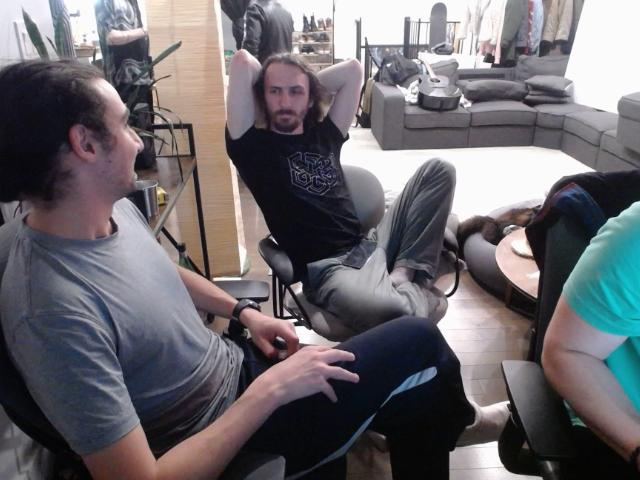

In [8]:
sample_image

In [9]:
import numpy as np

In [1]:
import torch
torch._dynamo.list_backends()

['cudagraphs', 'inductor', 'onnxrt', 'openxla', 'tvm']

In [10]:
i = np.asarray(sample_image)
i.shape, i.dtype

((480, 640, 3), dtype('uint8'))

In [13]:
p = np.asarray(pose_image)
p.shape, p.dtype

((1024, 1408, 3), dtype('uint8'))

In [14]:
d = np.asarray(depth_image)
d.shape, d.dtype

((1024, 1344, 3), dtype('uint8'))

In [16]:
# with torch.inference_mode():
#     res = pipeline(
#         prompt=prompt,
#         negative_prompt=config.NEGATIVE_PROMPT,
#         image=[pose_image, depth_image],
#         num_inference_steps=1,
#         adapter_conditioning_scale=[1.0, 1.0],
#         adapter_conditioning_factor=1.0,
#         generator=image_pipeline.generator,
#         guidance_scale=0.7,
#         # height=config.RESA_HEIGHT,
#         # width=config.RESA_WIDTH,
#     )

In [ ]:
res.images[0].size

In [ ]:
res.images[0]

In [ ]:
res.images[0].resize((config.DISPLAY_WIDTH, config.DISPLAY_HEIGHT), Image.Resampling.LANCZOS)

In [12]:
# import gc, torch
# gc.collect()
# torch.cuda.empty_cache()